## Import Packages

In [1]:
import numpy as np
import pandas as pd
import missingno

## Import Dataset

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


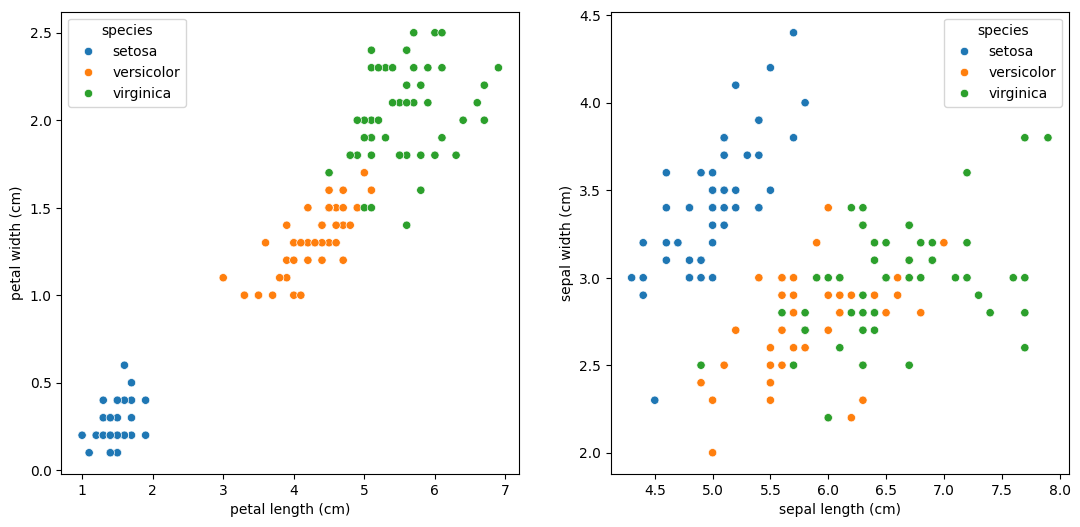

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="species")
plt.subplot(122)
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="species")
plt.show()

## SPLITTING

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="species")
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## TRAINING

In [19]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import PowerTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('power', PowerTransformer(method='yeo-johnson')),
            ('scaler', StandardScaler())
        ]), ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']),
    ]
)

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', OneVsRestClassifier(LogisticRegression()))
])

parameter = {
    'algo__estimator__C': [0.01, 0.1, 1, 10, 100],
    'algo__estimator__max_iter': [100, 200, 500],
    'algo__estimator__fit_intercept': [True, False],
    'algo__estimator__solver': ['lbfgs', 'saga']
}

In [32]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.score(X_train, y_train), grid_search.best_score_, grid_search.score(X_test, y_test))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'algo__estimator__C': 10, 'algo__estimator__fit_intercept': True, 'algo__estimator__max_iter': 100, 'algo__estimator__solver': 'lbfgs'}
0.9666666666666667 0.9333333333333332 0.9333333333333333


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('power', PowerTransformer(method='yeo-johnson')),
            ('scaler', StandardScaler())
        ]), ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']),
    ]
)

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='multinomial'))
])

parameter = {
    'algo__C': [0.01, 0.1, 1, 10, 100],
    'algo__max_iter': [100, 200, 500],
    'algo__fit_intercept': [True, False],
    'algo__solver': ['lbfgs', 'saga']
}

In [39]:
from sklearn.model_selection import GridSearchCV

model = grid_search = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.score(X_train, y_train), grid_search.best_score_, grid_search.score(X_test, y_test))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'algo__C': 10, 'algo__fit_intercept': True, 'algo__max_iter': 100, 'algo__solver': 'lbfgs'}
0.975 0.9583333333333334 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


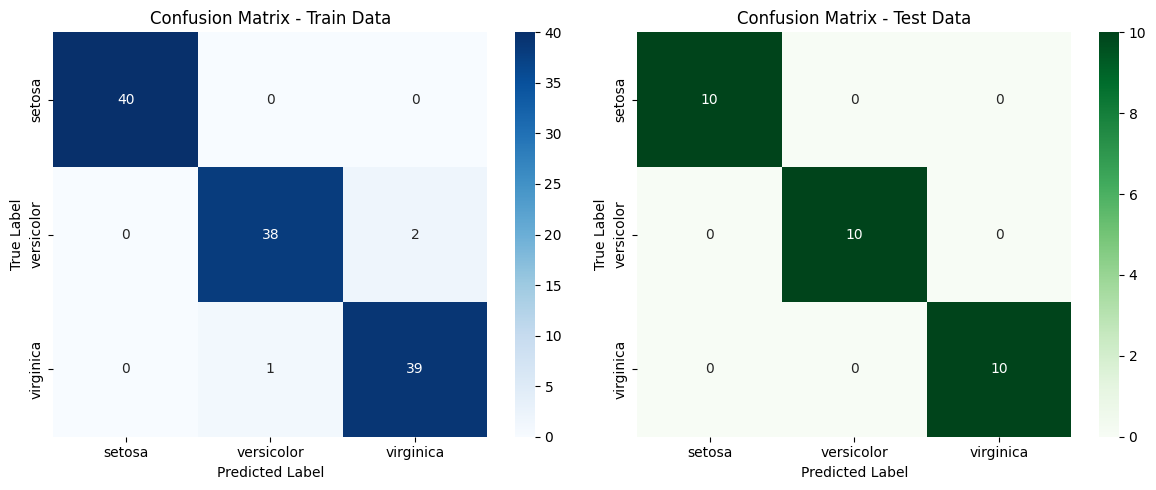

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix - Train Data")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix - Test Data")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Classification Report untuk Training Data
print("Classification Report - Train Data:")
print(classification_report(y_train, y_train_pred))

# Classification Report untuk Testing Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report - Train Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.95      0.96        40
   virginica       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


Classification Report - Test Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

